In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get("http://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#Check Python Version
import sys
assert(sys.version_info.major==3),print(sys.version)

#Matrices, Dataframe and Plotting Operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Model Packages for k-NN and Linear Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm

#Metrics, Performance Evaluation and Helpful functions
from sklearn import metrics, datasets
from collections import Counter
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Aesthetic settings
from IPython.display import display
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)

In [3]:
even_list = []
for i in range(21):
    if i%2==0:
        even_list.append(i)
print(even_list)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [4]:
list_a = ['a','b','c','d','e']
list_b = [1,2,3,4,5]
dict_list = {k:v for (k, v) in zip(list_a,list_b)}
print(dict_list)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}


In [5]:
url = 'https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/sections/section2/data/states.csv'
states=pd.read_csv(url, error_bad_lines=False)
print(states.head(10))
states.to_csv("data-section2/states.csv", index=False, header=True)
print(type(states))

             Unnamed: 0    1790    1800    1810    1820    1830    1840    1850    1860    1870  ...     1920     1930     1940      1950      1960      1970      1980      1990      2000      2010
0               Alabama       0    1250    9046  127901  309527  590756  771623  964201  996992  ...  2348174  2646248  2832961   3061743   3266740   3444165   3893888   4040587   4447100   4779736
1                Alaska       0       0       0       0       0       0       0       0       0  ...    55036    59278    72524    128643    226167    300382    401851    550043    626932    710231
2               Arizona       0       0       0       0       0       0       0       0    9658  ...   334162   435573   499261    749587   1302161   1770900   2718215   3665228   5130632   6392017
3              Arkansas       0       0    1062   14273   30388   97574  209897  435450  484471  ...  1752204  1854482  1949387   1909511   1786272   1923295   2286435   2350725   2673400   2915918
4         

In [6]:
columns_list = ['1920','1840']
states[columns_list]

,1920,1840
0,2348174,590756
1,55036,0
2,334162,0
3,1752204,97574
4,3426861,0
5,939629,0
6,1380631,309978
7,223003,78085
8,437571,33745
9,968470,54477


In [7]:
states[['1930','1940','1950','1960']]

,1930,1940,1950,1960
0,2646248,2832961,3061743,3266740
1,59278,72524,128643,226167
2,435573,499261,749587,1302161
3,1854482,1949387,1909511,1786272
4,5677251,6907387,10586223,15717204
5,1035791,1123296,1325089,1753947
6,1606903,1709242,2007280,2535234
7,238380,266505,318085,446292
8,486869,663091,802178,763956
9,1468211,1897414,2771305,4951560


In [8]:
len(states)

51

In [9]:
states.iloc[0:len(states), 0:3]

,Unnamed: 0,1790,1800
0,Alabama,0,1250
1,Alaska,0,0
2,Arizona,0,0
3,Arkansas,0,0
4,California,0,0
5,Colorado,0,0
6,Connecticut,237946,251002
7,Delaware,59096,64273
8,District of Columbia,0,8144
9,Florida,0,0


In [10]:
from IPython.display import display

In [11]:
print(states[columns_list].head())

      1920    1840
0  2348174  590756
1    55036       0
2   334162       0
3  1752204   97574
4  3426861       0


In [12]:
display(states[columns_list].head())

,1920,1840
0,2348174,590756
1,55036,0
2,334162,0
3,1752204,97574
4,3426861,0


In [13]:
states[0:25]

,Unnamed: 0,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,Alabama,0,1250,9046,127901,309527,590756,771623,964201,996992,...,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,4447100,4779736
1,Alaska,0,0,0,0,0,0,0,0,0,...,55036,59278,72524,128643,226167,300382,401851,550043,626932,710231
2,Arizona,0,0,0,0,0,0,0,0,9658,...,334162,435573,499261,749587,1302161,1770900,2718215,3665228,5130632,6392017
3,Arkansas,0,0,1062,14273,30388,97574,209897,435450,484471,...,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,2673400,2915918
4,California,0,0,0,0,0,0,92597,379994,560247,...,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,33871648,37253956
5,Colorado,0,0,0,0,0,0,0,34277,39864,...,939629,1035791,1123296,1325089,1753947,2207259,2889964,3294394,4301261,5029196
6,Connecticut,237946,251002,262042,275202,297675,309978,370792,460147,537454,...,1380631,1606903,1709242,2007280,2535234,3031709,3107576,3287116,3405565,3574097
7,Delaware,59096,64273,72674,72749,76748,78085,91532,112216,125015,...,223003,238380,266505,318085,446292,548104,594338,666168,783600,897934
8,District of Columbia,0,8144,15471,23336,30261,33745,51687,75080,131700,...,437571,486869,663091,802178,763956,756510,638333,606900,572059,601723
9,Florida,0,0,0,0,34730,54477,87445,140424,187748,...,968470,1468211,1897414,2771305,4951560,6789443,9746324,12937926,15982378,18801310


In [14]:
states[5:11]

,Unnamed: 0,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
5,Colorado,0,0,0,0,0,0,0,34277,39864,...,939629,1035791,1123296,1325089,1753947,2207259,2889964,3294394,4301261,5029196
6,Connecticut,237946,251002,262042,275202,297675,309978,370792,460147,537454,...,1380631,1606903,1709242,2007280,2535234,3031709,3107576,3287116,3405565,3574097
7,Delaware,59096,64273,72674,72749,76748,78085,91532,112216,125015,...,223003,238380,266505,318085,446292,548104,594338,666168,783600,897934
8,District of Columbia,0,8144,15471,23336,30261,33745,51687,75080,131700,...,437571,486869,663091,802178,763956,756510,638333,606900,572059,601723
9,Florida,0,0,0,0,34730,54477,87445,140424,187748,...,968470,1468211,1897414,2771305,4951560,6789443,9746324,12937926,15982378,18801310
10,Georgia,82548,162686,251407,340989,516823,691392,906185,1057286,1184109,...,2895832,2908506,3123723,3444578,3943116,4589575,5463105,6478216,8186453,9687653


In [15]:
row_list = np.arange(1,25,2)
print(row_list)
display(states.iloc[row_list,:])

[ 1  3  5  7  9 11 13 15 17 19 21 23]


,Unnamed: 0,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
1,Alaska,0,0,0,0,0,0,0,0,0,...,55036,59278,72524,128643,226167,300382,401851,550043,626932,710231
3,Arkansas,0,0,1062,14273,30388,97574,209897,435450,484471,...,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,2673400,2915918
5,Colorado,0,0,0,0,0,0,0,34277,39864,...,939629,1035791,1123296,1325089,1753947,2207259,2889964,3294394,4301261,5029196
7,Delaware,59096,64273,72674,72749,76748,78085,91532,112216,125015,...,223003,238380,266505,318085,446292,548104,594338,666168,783600,897934
9,Florida,0,0,0,0,34730,54477,87445,140424,187748,...,968470,1468211,1897414,2771305,4951560,6789443,9746324,12937926,15982378,18801310
11,Hawaii,0,0,0,0,0,0,0,0,0,...,255912,368336,423330,499794,632772,768561,964691,1108229,1211537,1360301
13,Illinois,0,2458,12282,55211,157445,476183,851470,1711951,2539891,...,6485280,7630654,7897241,8712176,10081158,11113976,11426518,11430602,12419293,12830632
15,Iowa,0,0,0,0,0,43112,192214,674913,1194020,...,2404021,2470939,2538268,2621073,2757537,2824376,2913808,2776755,2926324,3046355
17,Kentucky,73677,220959,406511,564317,687917,779828,982405,1155684,1321011,...,2416630,2614589,2845627,2944806,3038156,3218706,3660777,3685296,4041769,4339367
19,Maine,96540,151719,228705,298335,399455,501793,583169,628279,626915,...,768014,797423,847226,913774,969265,992048,1124660,1227928,1274923,1328361


In [16]:
data_url = "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/sections/section2/data/bikeshare.csv"
bikeshare = pd.read_csv(data_url, error_bad_lines=False)
display(bikeshare.head())
bikeshare.to_csv("data-section2/bikeshare.csv", index=False, header=True)
print(type(bikeshare))

,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,0,2.0,5.0,0.0,2.0,1.0,2.0,24.0,26.0,76.5833,0.118167,6073.0
1,1,4.0,12.0,0.0,2.0,1.0,1.0,15.0,19.0,73.3750,0.174129,6606.0
2,2,2.0,6.0,0.0,4.0,1.0,1.0,26.0,28.0,56.9583,0.253733,7363.0
3,3,4.0,12.0,0.0,0.0,0.0,1.0,0.0,4.0,58.6250,0.169779,2431.0
4,4,3.0,9.0,0.0,3.0,1.0,3.0,23.0,23.0,91.7083,0.097021,1996.0


<class 'pandas.core.frame.DataFrame'>


In [17]:
del bikeshare['Unnamed: 0']
print("Length of Dataset:",len(bikeshare))
display(bikeshare.head())

Length of Dataset: 731


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,2.0,5.0,0.0,2.0,1.0,2.0,24.0,26.0,76.5833,0.118167,6073.0
1,4.0,12.0,0.0,2.0,1.0,1.0,15.0,19.0,73.3750,0.174129,6606.0
2,2.0,6.0,0.0,4.0,1.0,1.0,26.0,28.0,56.9583,0.253733,7363.0
3,4.0,12.0,0.0,0.0,0.0,1.0,0.0,4.0,58.6250,0.169779,2431.0
4,3.0,9.0,0.0,3.0,1.0,3.0,23.0,23.0,91.7083,0.097021,1996.0


In [18]:
display(bikeshare.describe())

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,16.229822,18.885089,62.789406,0.190486,4552.354309
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,11.531101,10.278475,14.242910,0.077498,2021.971365
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-11.000000,-6.000000,0.000000,0.022392,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,10.000000,52.000000,0.134950,3116.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,16.000000,20.000000,62.666700,0.180975,4575.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.000000,27.000000,73.020850,0.233214,6048.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,39.000000,42.000000,97.250000,0.507463,10045.000000


In [19]:
bikeshare.groupby('month').mean()

,season,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
month,,,,,,,,,,
1.0,1.000000,0.048387,2.870968,0.645161,1.419355,-0.080645,4.145161,58.582827,0.206303,2498.306452
2.0,1.000000,0.035088,3.000000,0.684211,1.368421,3.912281,7.807018,56.746468,0.215684,2824.315789
3.0,1.354839,0.000000,3.096774,0.725806,1.451613,9.580645,13.080645,58.847503,0.222699,3822.241935
4.0,2.000000,0.033333,3.000000,0.666667,1.416667,14.583333,17.783333,58.806312,0.234482,4348.600000
5.0,2.000000,0.032258,2.903226,0.693548,1.403226,22.532258,24.661290,68.895831,0.182989,5268.790323
6.0,2.333333,0.000000,3.100000,0.716667,1.233333,28.150000,29.216667,57.580552,0.185420,5547.033333
7.0,3.000000,0.032258,2.935484,0.661290,1.193548,32.580645,33.338710,59.787632,0.166059,5563.677419
8.0,3.000000,0.000000,3.000000,0.741935,1.306452,29.629032,30.096774,63.773010,0.172918,5584.887097
9.0,3.266667,0.033333,3.050000,0.666667,1.500000,23.850000,25.466667,71.471437,0.165945,5653.316667


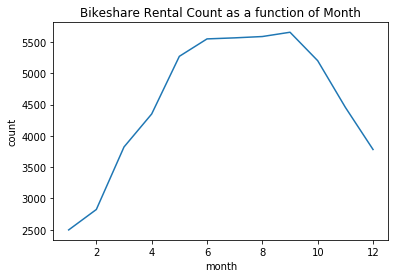

In [20]:
plt.plot(bikeshare.groupby('month').mean()['count'])
plt.xlabel('month')
plt.ylabel('count')
plt.title('Bikeshare Rental Count as a function of Month')
plt.show()

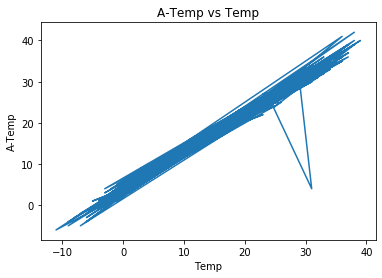

In [21]:
plt.plot(bikeshare['temp'],bikeshare['atemp'])
plt.xlabel('Temp')
plt.ylabel('A-Temp')
plt.title('A-Temp vs Temp')
plt.show()

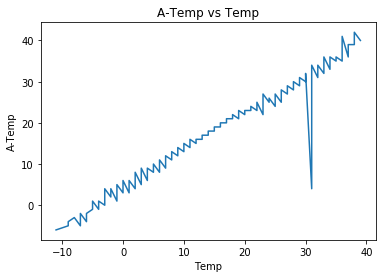

In [22]:
new = bikeshare.sort_values(['temp','atemp'])
plt.plot(new['temp'], new['atemp'])
plt.xlabel('Temp')
plt.ylabel('A-Temp')
plt.title('A-Temp vs Temp')
plt.show()

In [23]:
display(new.head())

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
176,1.0,1.0,0.0,6.0,0.0,1.0,-11.0,-6.0,40.0000,0.171970,981.0
265,1.0,1.0,0.0,0.0,0.0,1.0,-9.0,-5.0,43.6522,0.246600,986.0
367,1.0,1.0,0.0,1.0,1.0,1.0,-9.0,-4.0,49.1739,0.158330,1416.0
346,1.0,1.0,0.0,3.0,1.0,2.0,-8.0,-3.0,41.4583,0.184700,2368.0
82,1.0,2.0,0.0,0.0,0.0,1.0,-7.0,-5.0,46.4583,0.409212,1529.0


In [24]:
bikeshare= bikeshare.drop([188])
display(bikeshare[(bikeshare['temp']>30) & (bikeshare['atemp']<10)])

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count


In [25]:
#Function to takes in a dataset and normalizes it
def normalize(x):
    #print(x.shape)
    #print(np.min(x).shape)
    #print(np.min(x))
    num = x - np.min(x)
    denom = np.max(x) - np.min(x)
    return (num / denom)

#bikeshare_norm = normalize(bikeshare.iloc[:, 0:10])
bikeshare_norm = normalize(bikeshare)
display(bikeshare_norm.head())
bikeshare_norm.describe()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,0.333333,0.363636,0.0,0.333333,1.0,0.5,0.70,0.666667,0.787489,0.197445,0.603711
1,1.000000,1.000000,0.0,0.333333,1.0,0.0,0.52,0.520833,0.754499,0.312814,0.656889
2,0.333333,0.454545,0.0,0.666667,1.0,0.0,0.74,0.708333,0.585689,0.476922,0.732415
3,1.000000,1.000000,0.0,0.000000,0.0,0.0,0.22,0.208333,0.602828,0.303846,0.240347
4,0.666667,0.727273,0.0,0.500000,1.0,1.0,0.68,0.604167,0.943016,0.153852,0.196947


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.498630,0.501619,0.028767,0.499087,0.683562,0.197945,0.544192,0.518864,0.645730,0.346420,0.451641
std,0.370471,0.313986,0.167266,0.334131,0.465405,0.272536,0.230520,0.213973,0.146541,0.159845,0.201643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.272727,0.000000,0.166667,0.000000,0.000000,0.340000,0.333333,0.534704,0.232044,0.308640
50%,0.500000,0.545455,0.000000,0.500000,1.000000,0.000000,0.540000,0.541667,0.644816,0.326919,0.454006
75%,0.666667,0.818182,0.000000,0.833333,1.000000,0.500000,0.740000,0.687500,0.750964,0.434629,0.600718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
def normalize_cols(x, columns):
    for i in columns:
        x[i] = normalize(x[i])
    return x

In [27]:
bikeshare_norm2= normalize_cols(bikeshare ,bikeshare.columns )

In [28]:
display(bikeshare_norm2.head())
bikeshare.describe()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,0.333333,0.363636,0.0,0.333333,1.0,0.5,0.70,0.666667,0.787489,0.197445,0.603711
1,1.000000,1.000000,0.0,0.333333,1.0,0.0,0.52,0.520833,0.754499,0.312814,0.656889
2,0.333333,0.454545,0.0,0.666667,1.0,0.0,0.74,0.708333,0.585689,0.476922,0.732415
3,1.000000,1.000000,0.0,0.000000,0.0,0.0,0.22,0.208333,0.602828,0.303846,0.240347
4,0.666667,0.727273,0.0,0.500000,1.0,1.0,0.68,0.604167,0.943016,0.153852,0.196947


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.498630,0.501619,0.028767,0.499087,0.683562,0.197945,0.544192,0.518864,0.645730,0.346420,0.451641
std,0.370471,0.313986,0.167266,0.334131,0.465405,0.272536,0.230520,0.213973,0.146541,0.159845,0.201643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.272727,0.000000,0.166667,0.000000,0.000000,0.340000,0.333333,0.534704,0.232044,0.308640
50%,0.500000,0.545455,0.000000,0.500000,1.000000,0.000000,0.540000,0.541667,0.644816,0.326919,0.454006
75%,0.666667,0.818182,0.000000,0.833333,1.000000,0.500000,0.740000,0.687500,0.750964,0.434629,0.600718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


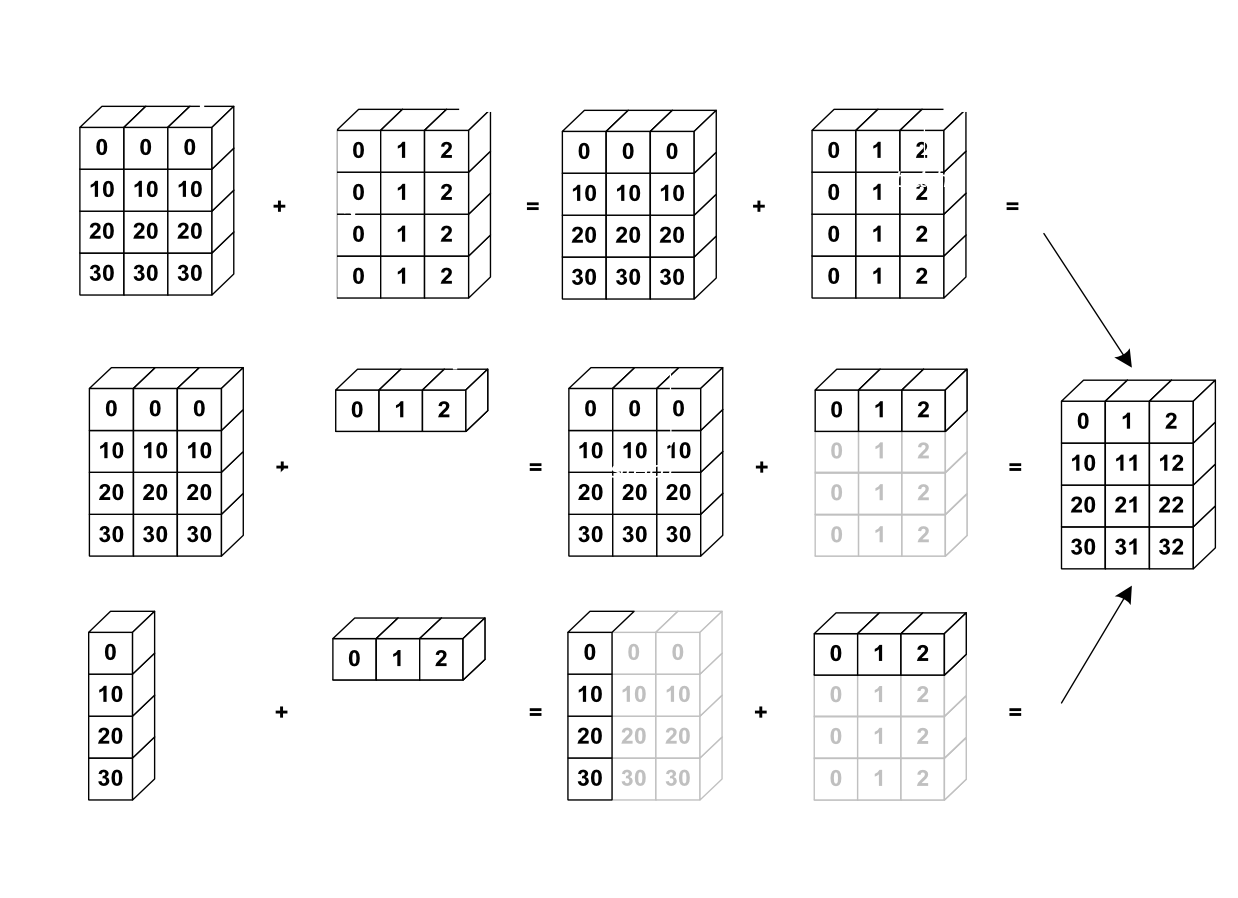

In [29]:
from IPython.display import Image
Image('http://www.scipy-lectures.org/_images/numpy_broadcasting.png')

In [30]:
print(bikeshare.columns)
bikeshare.iloc[:,0:10].head()

Index(['season', 'month', 'holiday', 'day_of_week', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count'], dtype='object')


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed
0,0.333333,0.363636,0.0,0.333333,1.0,0.5,0.70,0.666667,0.787489,0.197445
1,1.000000,1.000000,0.0,0.333333,1.0,0.0,0.52,0.520833,0.754499,0.312814
2,0.333333,0.454545,0.0,0.666667,1.0,0.0,0.74,0.708333,0.585689,0.476922
3,1.000000,1.000000,0.0,0.000000,0.0,0.0,0.22,0.208333,0.602828,0.303846
4,0.666667,0.727273,0.0,0.500000,1.0,1.0,0.68,0.604167,0.943016,0.153852


In [31]:
x = np.random.rand(100,5)
print(x)

[[0.04864716 0.76242452 0.11473414 0.34161932 0.35565375]
 [0.43006881 0.49580859 0.69179434 0.75120058 0.88362862]
 [0.02427495 0.71093694 0.81141951 0.04470849 0.02432106]
 [0.0786234  0.99483613 0.84133202 0.47490239 0.45536415]
 [0.74564228 0.68842835 0.30227275 0.40122396 0.79956587]
 [0.37813419 0.04430402 0.13501939 0.05561813 0.08902636]
 [0.26523789 0.79131315 0.526869   0.19680146 0.73777993]
 [0.75356566 0.57046837 0.82716862 0.63902428 0.84671548]
 [0.5656298  0.57746362 0.57705791 0.57098421 0.52287717]
 [0.83261266 0.84151186 0.54000058 0.74487964 0.23245025]
 [0.73851841 0.65336661 0.91925293 0.11434873 0.03543227]
 [0.48645215 0.53653041 0.28385663 0.68218463 0.03959827]
 [0.85689362 0.96247754 0.92165749 0.6286436  0.80605921]
 [0.60866386 0.69415441 0.07053651 0.1386162  0.68919561]
 [0.93217834 0.32964751 0.18886064 0.50278705 0.92148977]
 [0.241025   0.85086456 0.14679486 0.13012857 0.94845624]
 [0.43761044 0.85642459 0.90742028 0.43175582 0.38054288]
 [0.42415184 0

In [85]:
#sns.pairplot(bikeshare, x_vars=bikeshare.iloc[:,:10], y_vars=bikeshare['count'])

import math

def split_data(data):   
    index = math.ceil(0.7*len(data))
    indices = np.random.permutation(len(data))
    data_train_idx = indices[0:index]
    data_test_idx = indices[index:len(data)]
    return data.iloc[data_train_idx,:], data.iloc[data_test_idx,:]

In [86]:
train_data, test_data = split_data(bikeshare)
#test = split_data(bikeshare)
#print(test)
#print(len(test))
print("Length of Training set:",len(train_data))
print("Length of Testing set:",len(test_data))
assert abs(int(len(train_data)*3) - int(len(test_data) * 7)) <= 10
print(type(train_data))
display(train_data)
display(test_data)

Length of Training set: 511
Length of Testing set: 219
<class 'pandas.core.frame.DataFrame'>


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
706,1.000000,0.909091,0.0,0.833333,1.0,0.0,0.38,0.354167,0.556126,0.396161,0.595630
433,0.333333,0.272727,0.0,0.500000,1.0,0.5,0.50,0.500000,0.585262,0.299997,0.433503
473,1.000000,0.909091,0.0,0.333333,1.0,0.0,0.28,0.270833,0.583119,0.311544,0.565100
149,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.16,0.166667,0.670169,0.253515,0.107353
628,0.333333,0.181818,0.0,1.000000,0.0,0.5,0.46,0.458333,0.759211,0.470498,0.619874
231,1.000000,0.909091,1.0,0.166667,0.0,0.0,0.54,0.520833,0.762640,0.311552,0.623266
13,0.333333,0.363636,0.0,0.666667,1.0,0.0,0.66,0.645833,0.534704,0.426913,0.734511
702,0.666667,0.727273,0.0,0.000000,0.0,0.5,0.80,0.750000,0.838046,0.085924,0.577472
482,1.000000,0.818182,0.0,0.833333,1.0,0.0,0.48,0.458333,0.554413,0.438493,0.724334
311,0.000000,0.090909,0.0,0.833333,1.0,0.0,0.32,0.291667,0.541560,0.321817,0.411953


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
333,0.333333,0.454545,0.0,0.666667,1.0,0.5,0.94,0.895833,0.584404,0.262830,0.089095
14,1.000000,0.818182,0.0,0.000000,0.0,0.0,0.46,0.458333,0.762211,0.158989,0.434900
419,0.666667,0.727273,0.0,0.333333,1.0,0.0,0.84,0.791667,0.776350,0.441026,0.682630
332,0.000000,1.000000,0.0,0.666667,1.0,0.5,0.24,0.187500,0.671380,0.675656,0.208720
214,0.666667,0.545455,0.0,0.666667,1.0,0.0,0.90,0.875000,0.613539,0.540995,0.682331
349,0.666667,0.727273,0.0,1.000000,0.0,0.5,0.54,0.520833,0.738646,0.344863,0.447870
202,0.666667,0.545455,0.0,0.833333,1.0,0.5,0.76,0.708333,0.868038,0.384634,0.583458
287,0.000000,0.000000,0.0,0.166667,1.0,0.5,0.20,0.208333,0.937018,0.182068,0.240447
283,0.333333,0.363636,0.0,0.500000,1.0,0.5,0.74,0.708333,0.688946,0.230764,0.681732
245,1.000000,0.909091,0.0,0.833333,1.0,0.0,0.26,0.250000,0.421594,0.301278,0.336227


In [87]:
train_data.head()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
706,1.000000,0.909091,0.0,0.833333,1.0,0.0,0.38,0.354167,0.556126,0.396161,0.595630
433,0.333333,0.272727,0.0,0.500000,1.0,0.5,0.50,0.500000,0.585262,0.299997,0.433503
473,1.000000,0.909091,0.0,0.333333,1.0,0.0,0.28,0.270833,0.583119,0.311544,0.565100
149,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.16,0.166667,0.670169,0.253515,0.107353
628,0.333333,0.181818,0.0,1.000000,0.0,0.5,0.46,0.458333,0.759211,0.470498,0.619874


In [88]:
train_data.iloc[:5]

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
706,1.000000,0.909091,0.0,0.833333,1.0,0.0,0.38,0.354167,0.556126,0.396161,0.595630
433,0.333333,0.272727,0.0,0.500000,1.0,0.5,0.50,0.500000,0.585262,0.299997,0.433503
473,1.000000,0.909091,0.0,0.333333,1.0,0.0,0.28,0.270833,0.583119,0.311544,0.565100
149,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.16,0.166667,0.670169,0.253515,0.107353
628,0.333333,0.181818,0.0,1.000000,0.0,0.5,0.46,0.458333,0.759211,0.470498,0.619874


In [89]:
train_data.loc[3:9]

KeyError: 3

In [90]:
train_data.iloc[3:9]

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
149,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.16,0.166667,0.670169,0.253515,0.107353
628,0.333333,0.181818,0.0,1.000000,0.0,0.5,0.46,0.458333,0.759211,0.470498,0.619874
231,1.000000,0.909091,1.0,0.166667,0.0,0.0,0.54,0.520833,0.762640,0.311552,0.623266
13,0.333333,0.363636,0.0,0.666667,1.0,0.0,0.66,0.645833,0.534704,0.426913,0.734511
702,0.666667,0.727273,0.0,0.000000,0.0,0.5,0.80,0.750000,0.838046,0.085924,0.577472
482,1.000000,0.818182,0.0,0.833333,1.0,0.0,0.48,0.458333,0.554413,0.438493,0.724334


In [91]:
train_data_quick, test_data_quick = train_test_split(bikeshare, test_size =0.30, random_state=13)
print("Length of Training set:",len(train_data_quick))
print("Length of Testing set:",len(test_data_quick))

Length of Training set: 511
Length of Testing set: 219
